## Visualize the model
* https://github.com/keplr-io/quiver
* https://transcranial.github.io/keras-js

Install quiver: 
```
pip install --no-deps git+git://github.com/jakebian/quiver.git
```

## Show output (*activations*) of specific layer

In [1]:
from keras.models import load_model,Model
import dogs_vs_cats as dvc
import numpy as np
import h5py

modelname = "cnn_trained_model.h5"
cnn_model = load_model(modelname)

# load the mean
with h5py.File(modelname,"r") as f:
    media = f["media_modelo"][:]

Using Theano backend.


In [5]:
# Load some data
all_files = dvc.image_files()
all_files = np.array(all_files)
files_ten = all_files[np.random.choice(len(all_files),10)]
ten_img_features,ten_img_labels = dvc.load_image_set(files_ten,(3,50,50))
ten_img_features-=media

data file train.zip has already been downloaded
Data has already been extracted
loading image (1/10)


In [7]:
# Test network work as good as before
results = cnn_model.evaluate(ten_img_features,ten_img_labels)
print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(cnn_model.metrics_names,results)]))

10/10 [==============================] - 0s
loss: 0.4762 acc: 0.8000


In [9]:
# https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
model_maxpooling1 = Model(input=cnn_model.input,
                          output=cnn_model.get_layer("maxpooling2d_1").output)
print(model_maxpooling1.input_shape,
      model_maxpooling1.output_shape)

(None, 3, 50, 50) (None, 32, 23, 23)


In [10]:
feat_max_pooling = model_maxpooling1.predict(ten_img_features)
feat_max_pooling.shape

(10, 32, 23, 23)

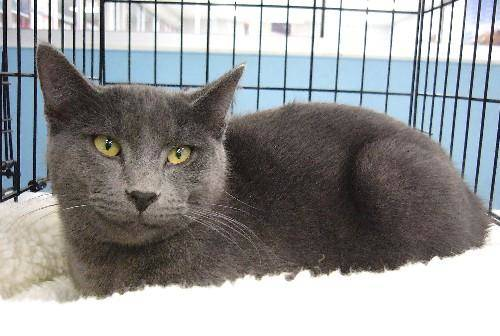

In [25]:
from IPython.display import Image, display
img_show = 3
display(Image(files_ten[img_show]))

<IPython.core.display.Javascript object>


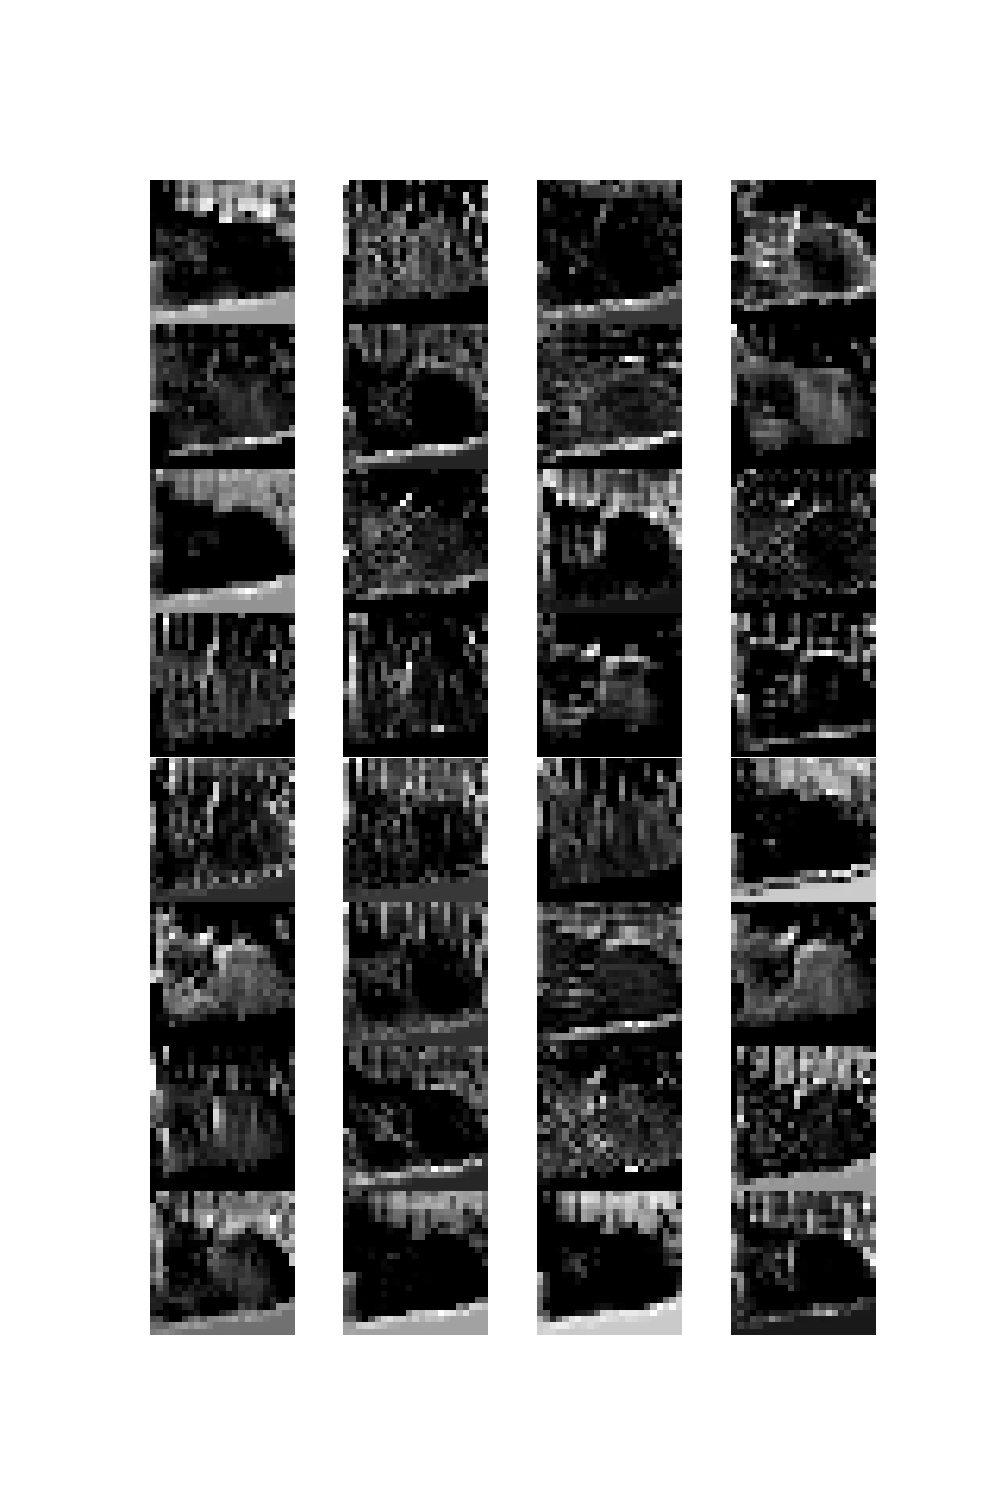

In [24]:
import matplotlib.pyplot as plt
%matplotlib notebook


fig, axs = plt.subplots(8,4,figsize=(10,15),sharex=True,sharey=True)
axs = axs.flatten()
feat_show = feat_max_pooling[img_show]
for ax,feats in zip(axs,feat_show):
    ax.imshow(feats,cmap="gray")
    ax.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

## Show convolutional filters

In [26]:
W,b = cnn_model.get_layer("convolution2d_1").get_weights()
W.shape,b.shape

((32, 3, 3, 3), (32,))

<IPython.core.display.Javascript object>


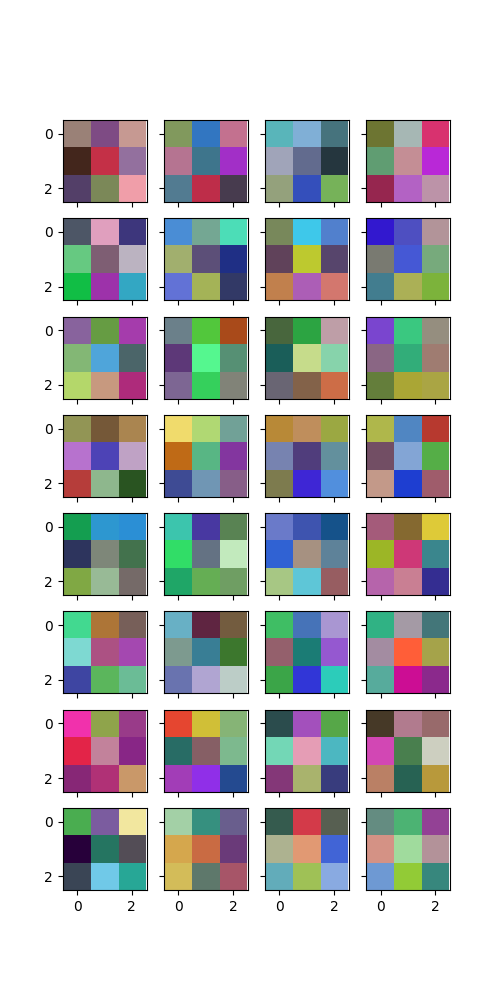

In [28]:
W_show = (W-W.min())/(W.max()-W.min())
%matplotlib notebook

fig, axs = plt.subplots(8,4,figsize=(5,10),sharex=True,sharey=True)
axs = axs.flatten()
for ax,w in zip(axs,W_show):
    ax.imshow(w)

In [33]:
from keras.applications.vgg16 import VGG16
import numpy as np

# https://keras.io/applications/#vgg16
model = VGG16(weights='imagenet')
W,b = model.get_layer("block1_conv1").get_weights()
W.shape,b.shape

((64, 3, 3, 3), (64,))

<IPython.core.display.Javascript object>


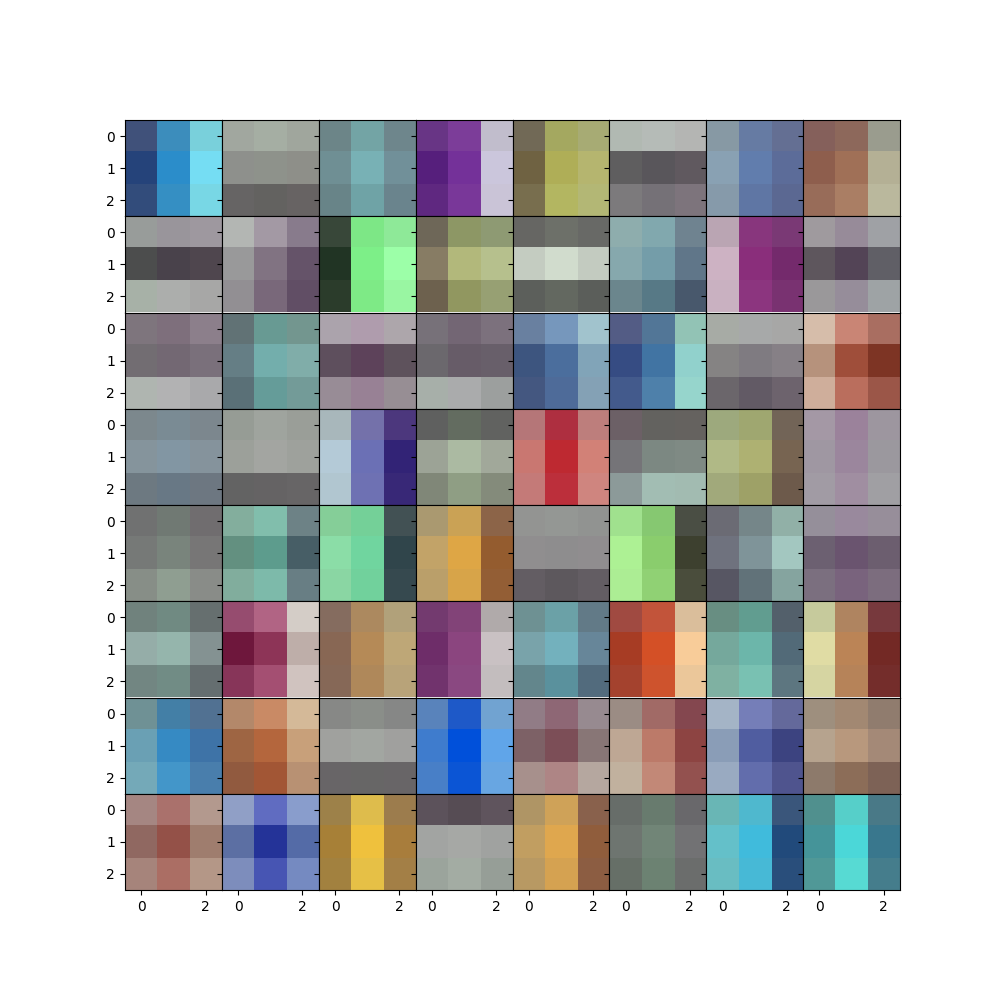

In [34]:
%matplotlib notebook

W_show = (W-W.min())/(W.max()-W.min())
fig, axs = plt.subplots(8,8,figsize=(10,10),sharex=True,sharey=True)
axs = axs.flatten()
for ax,w in zip(axs,W_show):
    ax.imshow(w)
plt.subplots_adjust(wspace=0, hspace=0)

## Show activations with `quiver`

In [ ]:
import os
import shutil

# copy some images in other dir to avoid saturate quiqver:
dirname = "trains_subset"
if not os.path.exists(dirname):
    os.mkdir(dirname)
    all_files = dvc.image_files()
    for img in all_files[np.random.choice(len(all_files),15)]:
        shutil.copy(img,
                    os.path.join(dirname,os.path.basename(img)))


In [ ]:
import quiver_engine.server as server
server.launch(cnn_model,classes=["dog","cat"],input_folder=dirname)

In [ ]:
!ls